#                 Честен ли генератор случайного урона World of Tanks и какое у него распределение?(спойлер - да)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
%matplotlib inline

## 1. Взято с https://www.youtube.com/channel/UCLZIN4aTXYm92c1ENyN8KmA

In [3]:
data = [['object 268', 750, [761, 680, 667]], ['Archer', 150, [142, 156, 162]], ['T110E4', 750, [831, 789, 710, 938]],
       ['AMX M4 1945', 560, [562, 553, 493, 604]], ['Object 277', 490, [524, 474, 520, 504, 499, 453]], ['60TP', 750, [680, 621]],
       ['60TPHE', 950, [1041]], ['T30', 750, [803, 710, 650, 828, 726, 767, 716]], ['ISU-152', 750, [686, 846]],
       ['Object 268 variant 4', 650, [682, 630]], ['SU-100Y', 440, [415, 378, 442]], ['Tiger II', 320, [320]], 
       ['T-34-85M', 180, [163, 186, 168, 171, 195, 169, 190, 175]], ['T20', 240, [257, 261, 240]], ['Caernarvon', 280, [286, 300, 276, 289]],
       ['WZ-111-1-4', 490, [490, 535, 516, 417]], ['Super Conqueror', 400, [407, 398, 336, 460, 457, 337, 446, 436, 395, 391, 386, 355, 362, 354, 399, 440]]]

In [4]:
data[:5]

[['object 268', 750, [761, 680, 667]],
 ['Archer', 150, [142, 156, 162]],
 ['T110E4', 750, [831, 789, 710, 938]],
 ['AMX M4 1945', 560, [562, 553, 493, 604]],
 ['Object 277', 490, [524, 474, 520, 504, 499, 453]]]

## 2. Масштабируем все к нулю ((урон/заявленный урон) - 1)

In [5]:
damages = []
for d in data:
    for dmg in d[2]:
        damages.append(dmg/d[1] - 1)

In [6]:
damages = np.array(damages)
damages[:5]

array([ 0.01466667, -0.09333333, -0.11066667, -0.05333333,  0.04      ])

In [7]:
len(damages)

73

## 3. Какое среднее?

In [8]:
damages.mean()

-0.001089335739505686

### Вывод : _**очень близко к нулю**_

In [9]:
damages_sorted = np.sort(damages)

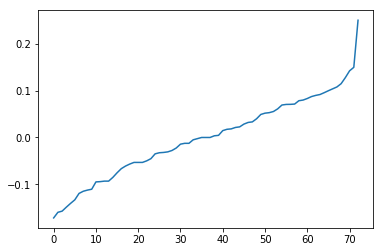

In [10]:
plt.plot(damages_sorted)

## 4. Построим гистограмму и посмотрим распрделение

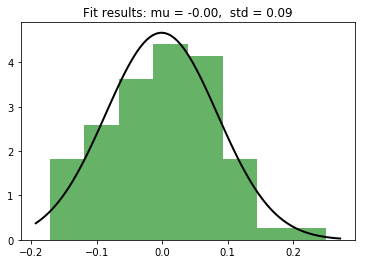

In [11]:
mu, std = norm.fit(damages_sorted)

# Plot the histogram.
plt.hist(damages_sorted, bins=8, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## 5. Вывод

Случайный урон близок к нормальному распределению с такими параметрами

Обозначим:

$$
\large{x = \mathcal{N(1, 0.09)}}
$$

(Это нормальное распределение со средним 1 и стандартным отклонением 0.3)

Тогда:

$$
\large{AD = \left([x < 0.75] * 0.75 + [x > 1.25] * 1.25 + [0.75 \leq x \leq 1.25] * x \right) * SD}
$$

### где AD - настоящий урон, SD - заявленный урон
### То есть генератор _**честный**_, в том плане что среднее значение совпадает со значением в ТТХ